# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('human_body_temperature.csv')

In [2]:
# Get information about the dataframe in which the human body temperature is stored

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
# Display the first 5 records:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
# Check if there are any NULLS for each column in the dataframe:
df.isnull().sum()

temperature    0
gender         0
heart_rate     0
dtype: int64

In [5]:
# Check if there are any duplicates in the dataframe:
df[df.duplicated(keep=False)]

,temperature,gender,heart_rate
7,98.8,M,78.0
54,98.2,F,73.0
72,98.0,M,78.0
75,98.8,M,78.0
87,98.0,M,78.0
127,98.2,F,73.0


The dataset looks clean , nothing invalid  observed.There are a few duplicates, can be type. Heart rate is not mentioned in the exercise requirements, but it could be interesting to look at the possible relationship with body temperature.

# Is the distribution of body temperatures normal? 

To answer the question, Probability Density Function can provide a view of the distribution:

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy.stats import norm
import scipy.stats
import math

In [7]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [8]:
observed_temperature = df.temperature.sort_values()

In [9]:
bin_values = np.arange(start=observed_temperature.min(), stop=observed_temperature.max(), step=.05)

In [10]:
bin_values

array([ 96.3 ,  96.35,  96.4 ,  96.45,  96.5 ,  96.55,  96.6 ,  96.65,
        96.7 ,  96.75,  96.8 ,  96.85,  96.9 ,  96.95,  97.  ,  97.05,
        97.1 ,  97.15,  97.2 ,  97.25,  97.3 ,  97.35,  97.4 ,  97.45,
        97.5 ,  97.55,  97.6 ,  97.65,  97.7 ,  97.75,  97.8 ,  97.85,
        97.9 ,  97.95,  98.  ,  98.05,  98.1 ,  98.15,  98.2 ,  98.25,
        98.3 ,  98.35,  98.4 ,  98.45,  98.5 ,  98.55,  98.6 ,  98.65,
        98.7 ,  98.75,  98.8 ,  98.85,  98.9 ,  98.95,  99.  ,  99.05,
        99.1 ,  99.15,  99.2 ,  99.25,  99.3 ,  99.35,  99.4 ,  99.45,
        99.5 ,  99.55,  99.6 ,  99.65,  99.7 ,  99.75,  99.8 ,  99.85,
        99.9 ,  99.95, 100.  , 100.05, 100.1 , 100.15, 100.2 , 100.25,
       100.3 , 100.35, 100.4 , 100.45, 100.5 , 100.55, 100.6 , 100.65,
       100.7 , 100.75])

In [11]:
mu, std = observed_temperature.mean(),observed_temperature.std()

In [12]:
mu, std

(98.24923076923076, 0.7331831580389453)

In [13]:
p=norm.pdf(observed_temperature,mu,std)

In [14]:
p

array([0.01588119, 0.02261115, 0.05836693, 0.05836693, 0.07714187,
       0.10007705, 0.12743824, 0.15928908, 0.15928908, 0.15928908,
       0.1954309 , 0.1954309 , 0.1954309 , 0.2353539 , 0.2782086 ,
       0.2782086 , 0.2782086 , 0.2782086 , 0.2782086 , 0.3228053 ,
       0.3228053 , 0.3676476 , 0.3676476 , 0.3676476 , 0.3676476 ,
       0.41100186, 0.41100186, 0.41100186, 0.45100027, 0.45100027,
       0.45100027, 0.45100027, 0.45100027, 0.45100027, 0.45100027,
       0.48577011, 0.48577011, 0.48577011, 0.48577011, 0.48577011,
       0.5135772 , 0.5135772 , 0.5135772 , 0.5135772 , 0.5135772 ,
       0.5135772 , 0.5135772 , 0.5135772 , 0.5135772 , 0.5135772 ,
       0.5135772 , 0.53296864, 0.53296864, 0.53296864, 0.54289837,
       0.54289837, 0.54289837, 0.54289837, 0.54289837, 0.54289837,
       0.54289837, 0.54289837, 0.54289837, 0.54289837, 0.54282069,
       0.54282069, 0.54282069, 0.54282069, 0.54282069, 0.53273989,
       0.53273989, 0.53273989, 0.53273989, 0.53273989, 0.53273

Text(0.5,1,'Distribution of Temperature \nMean:98.249 *** Std. Dev:0.7331 *** Mode:98.0')

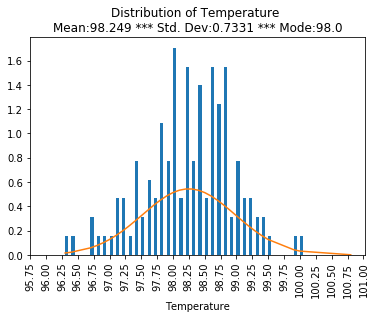

In [15]:
plt.hist(observed_temperature,bins=bin_values,normed=True,stacked=True)
plt.plot(observed_temperature, p)
plt.xlabel('Temperature')
xticks = plt.xticks(np.arange(95.75,101.25,0.25),rotation=90)
plt.title(('Distribution of Temperature \nMean:'+('{:3.6}'.format(str(mu)))+
           ' *** Std. Dev:'+('{:1.6}'.format(str(std)))+
          ' *** Mode:'+('{:3.6}'.format(str(observed_temperature.mode().values[0])))))

While outliers are present in the dataset, the distribution of body temperatures appears to be normal.  Let us validate with normaltest from p

In [16]:
k2,p=scipy.stats.normaltest(observed_temperature)
p

0.2587479863488212

In [17]:
if p < 0.05:
    print("Not Normal Distribution")
else:
    print("Normal Distribution")

Normal Distribution


Based on the p value, we can for sure say the distribution of body temperature is normal

In [ ]:
Histogram & Q-Q Plot shows body temperature distribution is NORMAL

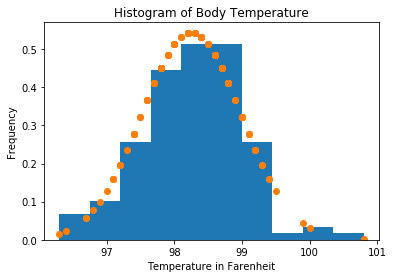

In [69]:
import scipy.stats as stats
 
plt.hist(df.temperature, normed=True)
normfit=stats.norm.pdf(df.temperature, mean, std)
plt.plot(df.temperature, normfit, 'o')
plt.xlabel('Temperature in Farenheit')
plt.ylabel('Frequency')
plt.title('Histogram of Body Temperature')
plt.show()

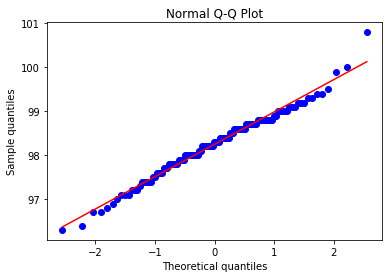

In [70]:
## QQ plot
import pylab 

 
stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.title("Normal Q-Q Plot")
pylab.ylabel("Sample quantiles")
pylab.show()

# Is the sample size large? Are the observations independent? 

In [18]:
# Check size of the data set
len(df)

130

The dataset size, 130, for the body temperature dataset is greater than 30 which is considered large for Central Limit Theorem.
The observations are independent, as they are not influenced by and reveal no information about any other observation. Each value for temperature represents a distinct measure of such.

# Is the true population mean really 98.6 degrees F?  

Null Hypothesis: The true population mean is equal to the conventional mean 98.6 F
Ho: True Population Mean is 98.6 F 
    H0: μ = 98.6
H1: True Population Mean is not 98.6 F
    H1: μ ≠ 98.6

One sample test is appropriate to use since a set of temperatures will be tested against the population mean of 98.6 F. Z-statistic is appropriate to use in this case since sample size>30. If calculated p_value is < assumed p_value of 0.05, then Ho will be rejected.
It is best to use a one-sample test since one set of data is compared to a single value. For this situation, it is best to use a t-statistic since the population standard deviation is unknown. Though a t-test is best for small samples, it becomes similar to the z-test with large samples, so the results shouldn't differ much.

In [32]:
## Calculate t- value  (t-value= signal/noise)
mean=df.temperature.mean()
std=df.temperature.std()
median=df.temperature.median()
sample_size=df.temperature.size

signal=mean-98.6
noise=std/(sample_size**0.5)
z_val=signal/noise
z_val

-5.454823292364079

In [33]:
# Calculate standard error of the mean:
s=np.std(df.temperature)
n = n = len(df.temperature)
sem = s/np.sqrt(n)

print('Standard Error of the Mean:', sem)

Standard Error of the Mean: 0.06405661469519336


In [27]:
#This tells us that sample mean of 98.25 F is 5.18 standard error units  below the assumed population mean of 98.6 F

In [34]:
# Probability that True Mean is within 5.45 std of 98.25 F
import scipy.stats as stats
P_value=stats.norm.cdf(z_val) * 2 # two sided
P_value

4.90215701411338e-08

In [35]:
if P_value<0.05:
    print('Ho must be rejected. True Population Mean is NOT 98.6 F')
else:
    print('Ho is True.  True Population mean is 98.6 F.')

Ho must be rejected. True Population Mean is NOT 98.6 F


#Comparing Z-statistic and t-statistic 

In [36]:
t_val=signal/noise       # n=130, df=129
t_val

-5.454823292364079

In [37]:
#Calculate critical t-value
# n=130, p<0.05, 2-tail
critical_t=stats.t.ppf(1-0.025, 129)
critical_t

1.978524491458605

In [38]:
moe_t=critical_t*std/np.sqrt(130)
moe_t

0.12722786362273045

In [39]:
#Calculate critical z-value
# CI=95%, 2-tail= CI=97.5%, 1-tail
critical_z=stats.norm.ppf(0.975)
critical_z

1.959963984540054

In [40]:
moe_z=std*critical_z/np.sqrt(130)
moe_z

0.1260343410491174

In [41]:
# Range of true mean using z-statistic with 95% confidence level
mean_z1=mean+moe_z
mean_z2=mean-moe_z

In [42]:
# Range of true mean using t- statistic with 95% confidence level, n=130 so degrees of freedom=129
mean_t1=mean+moe_t
mean_t2=mean-moe_t

# True Mean Range using z-statistic

In [45]:
print("Using z-statistic with 95% confindence level, range of true mean is ", 
      round(mean_z2,2), " F to ", round(mean_z1,2), " F.")

Using z-statistic with 95% confindence level, range of true mean is  98.12  F to  98.38  F.


# True Mean Range using t-statistic

In [46]:
print("Using t-statistic with 95% confindence level, range of true mean is ", 
      round(mean_t2,2), " F to ", round(mean_t1,2), " F.")

Using t-statistic with 95% confindence level, range of true mean is  98.12  F to  98.38  F.


This range is the same since sample size of 130 is sufficiently large. For n>30 results for z-statistic and t-statistic will yield same results

# At what temperature should we consider someone's temperature to be "abnormal"?

In [47]:
# Margin of error
moe_z = 1.96 * std/ np.sqrt(130)

In [48]:
#Confidence interval
ci = mean + np.array([-1, 1]) * moe_z
ci

array([98.12319411, 98.37526743])

In [49]:
print("Normal temperature range is ", 
      round(mean_z2,2), " F to ", round(mean_z1,2), " F. Outside this range is ABNORMAL!")

Normal temperature range is  98.12  F to  98.38  F. Outside this range is ABNORMAL!


That means 98.6 F is considered ABNORMAL

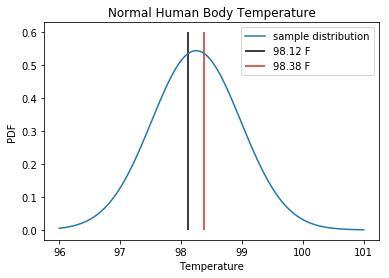

In [51]:
import pylab
x = np.linspace(96,101,130)
y = stats.norm.pdf(x, loc=mean, scale=std)    
pylab.plot(x,y)

pylab.xlabel('Temperature')
pylab.ylabel('PDF')
pylab.vlines(mean_t2,0, 0.6)
pylab.vlines(mean_t1,0,0.6, color='C3')

pylab.legend(['sample distribution','98.12 F', '98.38 F'])
pylab.title('Normal Human Body Temperature')
    
pylab.show()

# Is there a significant difference between males and females in normal temperature?

Ho: female mean tempearture is equal to male mean temperature 
H1: female mean temperature is not equal to male mean temperature

In [53]:
##Male Temperatures
men=df[df.gender=='M']
men.shape

(65, 3)

In [54]:
men.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [55]:
men_mean_temp=men.temperature.mean()
men_mean_temp

98.1046153846154

In [56]:
men_std_temp=men.temperature.std()
men_std_temp

0.6987557623265908

In [57]:
##Female Temperatures
fem=df[df.gender=='F']
fem.shape

(65, 3)

In [59]:
fem.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


In [60]:
fem_mean_temp=fem.temperature.mean()
fem_mean_temp

98.39384615384613

In [61]:
fem_std_temp=fem.temperature.std()
fem_std_temp

0.7434877527313665

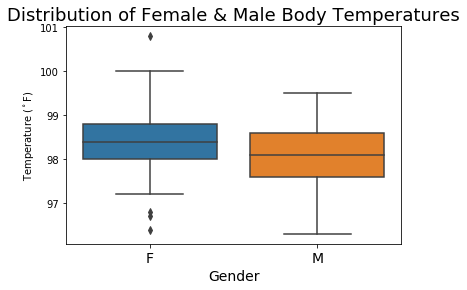

In [71]:
# Create boxplots for temperature by gender:
fig = sns.boxplot(x='gender', y='temperature', data=df)

# Increase tick mark font size, label axes and add title:
plt.tick_params(axis='x', which='major', labelsize=14)
fig = plt.xlabel('Gender', fontsize=14)
fig = plt.ylabel('Temperature ($^\circ$F)')
plt.title('Distribution of Female & Male Body Temperatures', fontsize=18)

# Display the plots:
plt.show()

In [62]:
## Diference in mean of Male and Female temperatures
mean_diff=fem_mean_temp - men_mean_temp
mean_diff

0.289230769230727

In [63]:
## Standard Error Calculation
SE=((men_std_temp**2)/65 + (fem_std_temp**2)/65)**0.5
SE

0.12655395041982642

In [64]:
## Degrees of Freedom Calculation
F1=fem_std_temp**2/65
M1=men_std_temp**2/65

DF=((F1+M1)**2)/(((F1**2)/64)+((M1**2)/64))
DF

127.5103008303909

In [65]:
## Use 0.05 Significance level in two sample t-test
t_val=((fem_mean_temp-men_mean_temp)-0)/SE
t_val

2.285434538165274

In [66]:
p_value = stats.t.sf(np.abs(2.29), 128)*2  # two-sided pvalue = Prob(abs(t)>tt)
p_value

0.023657711289024146

In [67]:
if p_value<0.05:
    print('Ho: Mean of female and male temperature are the same will be rejected.')
    print('There is significance difference between male and female body temperatures.')
else: 
    print('Ho: Mean of female and amle temperature are the same IS TRUE!')

Ho that mean of female and male temperature are the same will be rejected.
There is significance difference between male and female body temperatures.


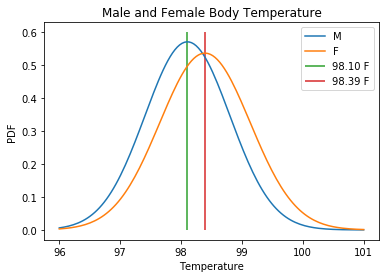

In [68]:
#Normal Distribution graph of Male and Female Temperatures
x = np.linspace(96,101,130)
y1 = stats.norm.pdf(x, loc=men_mean_temp, scale=men_std_temp)    
pylab.plot(x,y1)

y2 = stats.norm.pdf(x, loc=fem_mean_temp, scale=fem_std_temp)    
pylab.plot(x,y2)
pylab.xlabel('Temperature')
pylab.ylabel('PDF')
pylab.vlines(men_mean_temp,0, 0.6, color='C2')
pylab.vlines(fem_mean_temp,0,0.6, color='C3')
pylab.legend(['M', 'F', '98.10 F', '98.39 F'])
pylab.title('Male and Female Body Temperature')
pylab.show()

In [73]:
# Define a function to compute the CDF:

def cdf(data):
    """Compute CDF for a one-dimensional array of measurements."""

    # Number of data points:
    n = len(data)

    # x-data for the CDF:
    x = np.sort(data)

    # y-data for the CDF:
    y = np.arange(1, n+1) / n

    return x, y

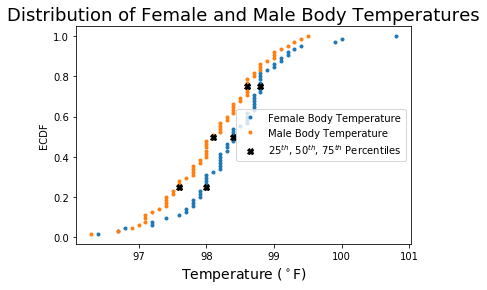

In [75]:
# Compute percentiles:
percentile = np.array([25,50,75])
f_percentiles = np.percentile(df.temperature[df.gender == 'F'], percentile)
m_percentiles = np.percentile(df.temperature[df.gender == 'M'], percentile)

# Compute ECDFs:
fx_temp, fy_temp = cdf(df.temperature[df.gender == 'F'])
mx_temp, my_temp = cdf(df.temperature[df.gender == 'M'])

# Plot both ECDFs on the same plot:
fig = plt.plot(fx_temp, fy_temp, marker='.', linestyle='none')
fig = plt.plot(mx_temp, my_temp, marker='.', linestyle='none')

# Overlay percentiles on each plot:
fig = plt.plot(f_percentiles, percentile/100, marker='X', linestyle='none', color='black')
fig = plt.plot(m_percentiles, percentile/100, marker='X', linestyle='none', color='black')

# Label axes and add legend and a title:
fig = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
fig = plt.ylabel('ECDF')
fig = plt.legend(('Female Body Temperature', 'Male Body Temperature', '25$^{th}$, 50$^{th}$, 75$^{th}$ Percentiles'), loc='center right')
fig = plt.title('Distribution of Female and Male Body Temperatures', fontsize=18)

# Save and display the plots:
#plt.savefig('reports/figures/cdf_female_male_temps.png')
plt.show()

# What is the True Normal Human Body Temperature?

The average temperature from this study is 98.2°F, so perhaps that is the true normal human body temperature.
Nonetheless, there is sufficient evidence to warrant rejection of the claim that the true population average is the conventional normal human body temperature of 98.6°F. Though it's a likely value.